# Fits file viewer

In [10]:
%matplotlib widget
import numpy as np 
import astropy.io.fits as fits
import os.path
import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter("ignore", category=AstropyWarning)
import matplotlib.pyplot as plt

In [19]:
#CREATE FILE PATHS
bias_dir = "D:\A5_2022\images\BIAS\ORIGINALS"
flat_r_dir = 'D:\A5_2022\images\FLAT_R'
flat_r_norm_dir = 'D:\A5_2022\images\FLAT_R_norm'
science_orig = 'D:\A5_2022\images\SDSS1650+4251_R\ORIGINALS'
image_file_name = "SCIENCE_R.00000012.PGC_2110595.FIT"
#imagepath = os.path.join(rawdatadir,image_file_name)


## Bias images

In [24]:
image_file_name = "image007953.fits"
imagepath = os.path.join(bias_dir,image_file_name)
hdul = fits.open(imagepath)
hdu = hdul[0]
#print(hdu.header)

In [25]:
print(hdu.data)
print(hdu.data.shape)
print("min val:", np.min(hdu.data))
print("max val:",np.max(hdu.data))

[[ 200 1158  194 ...  194  194  194]
 [ 195 1160  194 ...  192  194  195]
 [ 194 1155  196 ...  196  194  194]
 ...
 [ 191 1162  195 ...  191  195  195]
 [ 189 1160  194 ...  196  194  192]
 [ 197 1157  194 ...  196  195  195]]
(1088, 2148)
min val: 186
max val: 2719


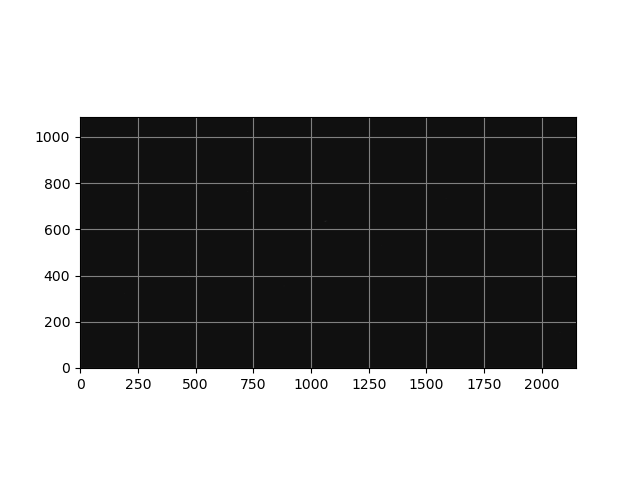

In [26]:
fig = plt.figure()
ax = fig.subplots()
ax.imshow(hdu.data, cmap=plt.cm.gray, vmin = 0, vmax=3000,origin='lower')
ax.grid(color='gray')

In [28]:
import astropy.visualization

def visualize_image(array, vmin=None, vmax=None, scale=None, percentile=None, lower_percentile=None, upper_percentile=None):
    if scale is not None:
        if scale=='zscale':
            vis=astropy.visualization.ZScaleInterval(nsamples=1000, contrast=0.25, max_reject=0.5, 
                                             min_npixels=5, krej=2.5, max_iterations=5)
        elif scale=='minmax': vis=astropy.visualization.MinMaxInterval()
        if percentile is not None: vis=astropy.visualization.PercentileInterval(percentile)
        if (lower_percentile is not None )& (upper_percentile is not None):
                vis=astropy.visualization.AsymmetricPercentileInterval(lower_percentile, upper_percentile )       
        vmin,vmax=vis.get_limits(array)
    print("using vmin, vmax: %.3f, %.3f"%(vmin,vmax))
    fig = plt.figure(dpi=200)
    ax = fig.subplots()
    ax.axis('off')
    #ax.axes.xaxis.set_visible(False)
    #ax.axes.yaxis.set_visible(False)
    ax.imshow( array , cmap = plt.cm.gray , vmin = vmin , vmax =vmax , origin = 'lower')
    #ax.grid( color = 'gray') 


In [ ]:
visualize_image(masterbias,scale='zscale')